<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1124_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **| 기본 분류: 의류 이미지 분류**

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## 1. 패션 MNIST 데이터셋 import

* 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다.

* 이미지는 해상도(28x28 픽셀)가 낮고 개별 옷 품목을 나타냅니다


[패션 MNIST]

컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용된다.


1) TensorFlow에서 직접 Fashion MNIST 데이터를 가져오고 로드

* load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환된다.
* `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 훈련 세트입니다.
* `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 테스트 세트입니다.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


2) 데이터셋에 클래스 이름이 들어있지 않기 때문에 별도의 변수를 만들어 저장

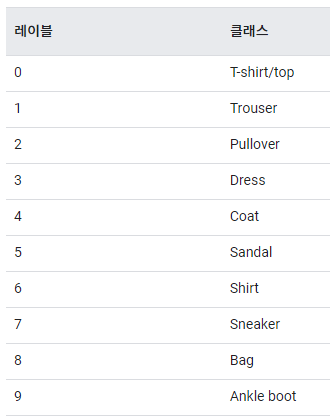

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. 데이터 탐색

다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여준다. 각 이미지는 28x28 픽셀로 표현된다.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

=> 비슷하게 훈련 세트에는 60,000개의 레이블이 있다.

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

=> 각 레이블은 0과 9사이의 정수입니다

In [7]:
test_images.shape

(10000, 28, 28)

=> 테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현된다.

In [8]:
len(test_labels)

10000

## 3. 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 한다.

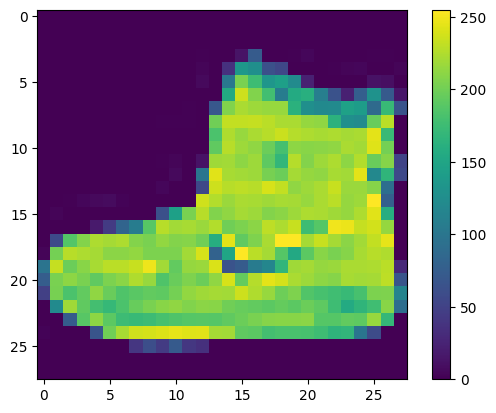

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* 0~1 사이의 값으로 전처리

    신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정. 이렇게 하려면 255로 나누어야 한다.

    이때, 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요하다.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

* 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력

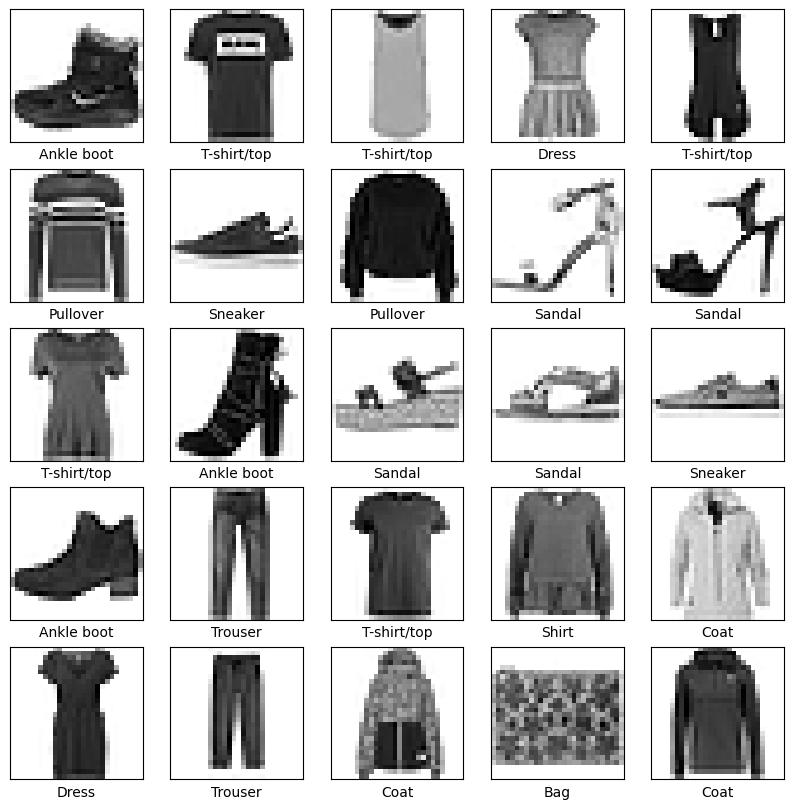

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

1) 층 설정

신경망의 기본 빌딩 블록은 레이어 이다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출한다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됨.

* `tf.keras.layers.Flatten`

    이 네트워크의 첫 번째 층인 tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

* `tf.keras.layers.Dense`

    픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2) 모델 컴파일

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

* 손실 함수

    훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.

* 옵티마이저

    모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.


* 메트릭

    훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. 모델 훈련

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.

2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.

3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.

4. 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

1) 모델 fit

훈련을 시작하려면 `model.fit` 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4999 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3789 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3366 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3149 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2955 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2802 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2492 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

=> 모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

2) 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3605 - accuracy: 0.8756 - 1s/epoch - 3ms/step

Test accuracy: 0.8755999803543091


=> 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 이는 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다.

=> 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.


## 6. 예측하기

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [19]:
predictions[0]

array([3.1854665e-07, 1.1661676e-10, 3.5244133e-07, 1.5074194e-09,
       2.6004077e-09, 6.6068233e-03, 3.2765601e-07, 2.2116352e-02,
       3.4968174e-08, 9.7127587e-01], dtype=float32)

=> 이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다

In [20]:
np.argmax(predictions[0])

9

=> 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다.

In [21]:
test_labels[0]

9

* 10개 클래스에 대한 예측을 모두 그래프로 표현

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

* 이미지, 예측, 신뢰도 점수 배열 확인

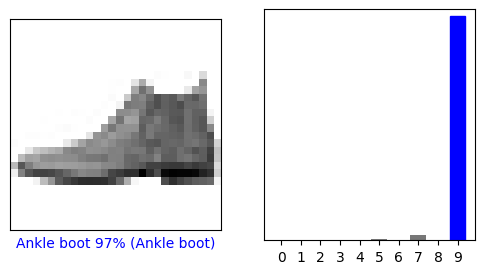

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

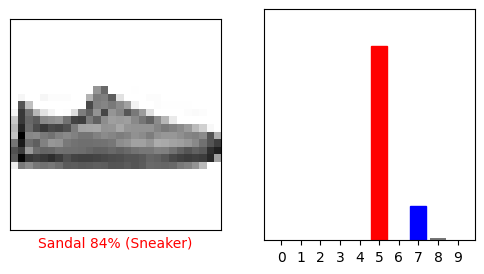

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

=> 몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

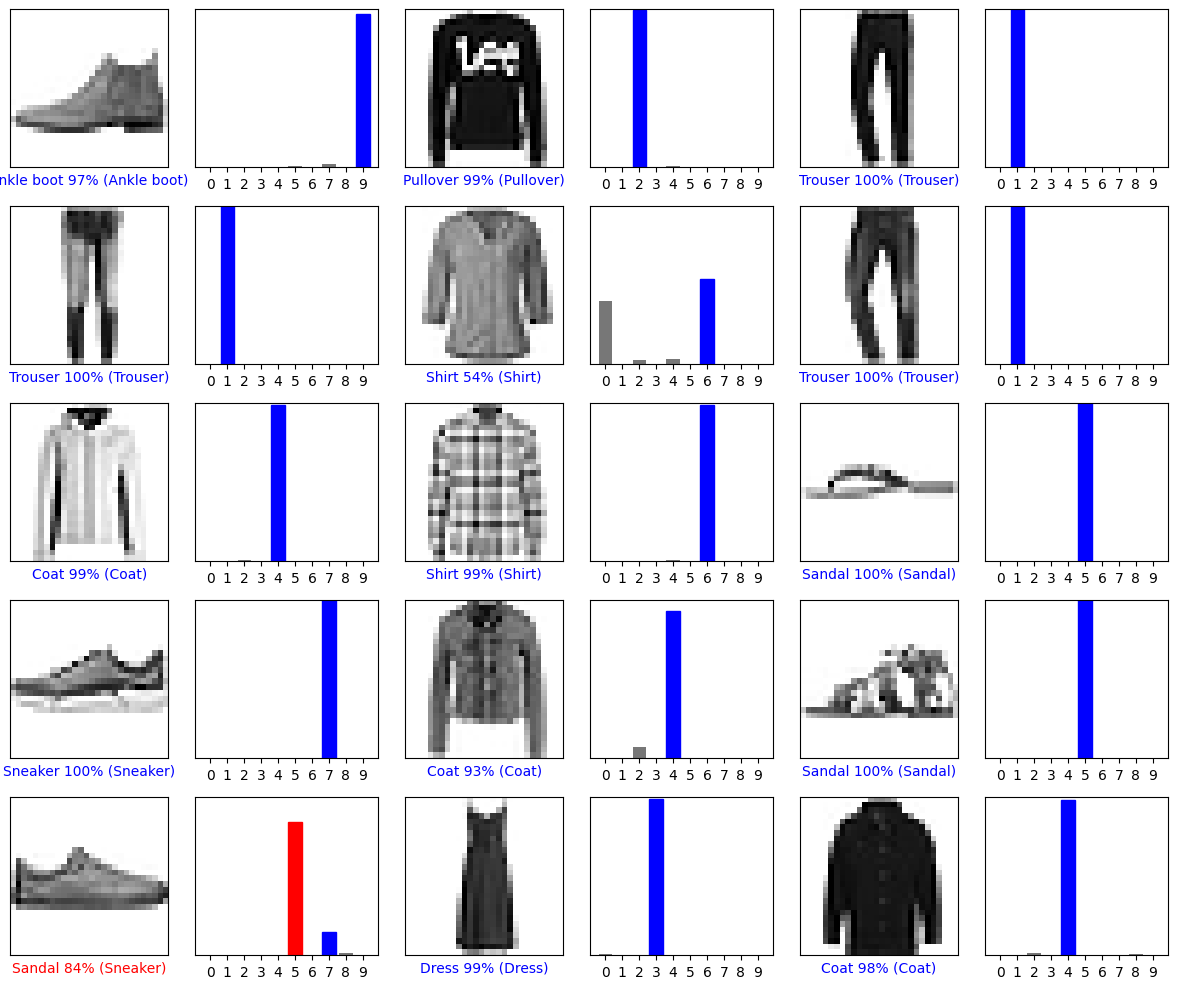

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 7. 훈련된 모델 사용하기


In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


* tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 한다.

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 147ms/step
[[2.4127827e-05 5.6965831e-11 9.9418443e-01 6.7382966e-10 5.6764814e-03
  1.9919752e-12 1.1500756e-04 4.1184969e-17 1.2141328e-09 2.5369672e-15]]


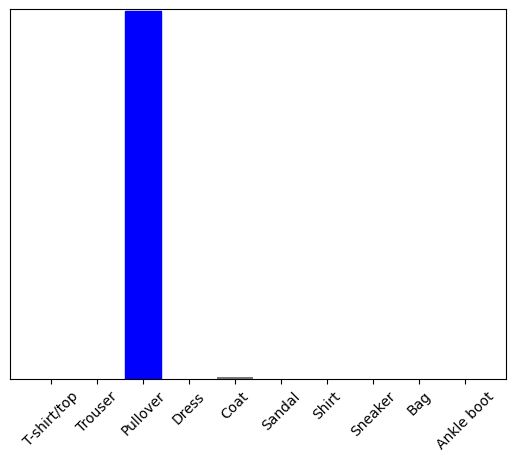

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2